# Importing Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.subplots as sp
import warnings
warnings.filterwarnings('ignore')

# Clinical Terminology

Before jumping into the dataset, lets look at some basic definitions of the common clinical trial terminologies:

![](https://miro.medium.com/max/1400/1*gi_w8mUa3UmZFu86uOILBg.png)

For more information on Clinical Trials related glossary, refer to [this](https://clinicaltrials.gov/ct2/about-studies/glossary) and [this](https://medium.com/@gauravkantgoel/clinical-trials-glossary-6e1b4dc01e0d)

In [ ]:
file_id = "1WessMr8tdADxk04uVT-AaoP3_CxwJIYR"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


# Data Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5783, 27)

In [ ]:
df.describe()

,Rank,Enrollment
count,5783.000000,5.749000e+03
mean,2892.000000,1.831949e+04
std,1669.552635,4.045437e+05
min,1.000000,0.000000e+00
25%,1446.500000,6.000000e+01
50%,2892.000000,1.700000e+02
75%,4337.500000,5.600000e+02
max,5783.000000,2.000000e+07


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
NCT Number,5783,5783,NCT04785898,1
Title,5783,5775,Study Assessing Vagus Nerve Stimulation in CoV...,2
Acronym,2480,2338,COVID-19,47
Status,5783,12,Recruiting,2805
Study Results,5783,2,No Results Available,5747
Conditions,5783,3067,COVID-19,720
Interventions,4897,4337,Other: No intervention,32
Outcome Measures,5748,5687,Mortality,5
Sponsor/Collaborators,5783,3631,Assistance Publique - Hôpitaux de Paris,78
Gender,5773,3,All,5567


In [ ]:
des = pd.DataFrame({"Null Values": df.isnull().sum(),"Null %": round((df.isnull().sum()/df.shape[0]) * 100) ,"Data Type": df.dtypes, "Unique Values": df.nunique()})
des

,Null Values,Null %,Data Type,Unique Values
Rank,0,0.0,int64,5783
NCT Number,0,0.0,object,5783
Title,0,0.0,object,5775
Acronym,3303,57.0,object,2338
Status,0,0.0,object,12
Study Results,0,0.0,object,2
Conditions,0,0.0,object,3067
Interventions,886,15.0,object,4337
Outcome Measures,35,1.0,object,5687
Sponsor/Collaborators,0,0.0,object,3631


In [ ]:
# Drop columns with a high percentage of missing values or fill them

# df.drop(columns=['Acronym', 'Study Documents', 'Results First Posted'], inplace=True)

In [ ]:
df['Status'].value_counts().sort_values(ascending=True).reset_index()

,Status,count
0,Temporarily not available,1
1,Approved for marketing,2
2,No longer available,12
3,Available,19
4,Suspended,27
5,Terminated,74
6,Withdrawn,107
7,Enrolling by invitation,181
8,"Active, not recruiting",526
9,Not yet recruiting,1004


In [ ]:
colors = ["#b1e7cd","#854442","#000000","#fff4e6","#3c2f2f",
           "#be9b7b ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

color_2 = px.colors.sequential.RdBu

# EDA

## Univariate Analysis

In [ ]:
# Status Distribution: Analyze the status of clinical trials (e.g., Completed, Ongoing)

# Create a DataFrame from the value counts
df_counts = df['Status'].value_counts().sort_values(ascending=True).reset_index()
df_counts.columns = ['Status', 'count']

# Create the bar chart using Plotly Express
fig = px.bar(df_counts, x='count', y='Status', orientation='h', color_discrete_sequence=colors, template='plotly_dark')

# Update the layout of the chart
fig.update_traces(
    text=df_counts['count'],
    textposition='outside',
    textfont=dict(size=12)
)
fig.update_layout(title='Count of Overall Status')

# Show the chart
fig.show()

1. **Out of 5783 records 2085 instance are on Recruting Phase**
2. **Only 1025 has Completed the test**
2. **Rest of the status results are depriving**

In [ ]:
# Phase Distribution: Understand the distribution of trial phases.

# Create a DataFrame from the value counts
df_phases = df['Phases'].value_counts().sort_values(ascending=True).reset_index()
df_phases.columns = ['Phases', 'count']

# Create the bar chart using Plotly Express
fig = px.bar(df_phases, x='count', y='Phases', orientation='h', color_discrete_sequence=colors, template='plotly_dark')

# Update the layout of the chart
fig.update_traces(
    text=df_phases['count'],
    textposition='outside',
    textfont=dict(size=12)
)
fig.update_layout(title='Count of Overall Phases')

# Show the chart
fig.show()

**Maximum Phases are Not Applicable**

In [ ]:
# ● Age Group Analysis: Analyze the distribution of age groups.

# Create a DataFrame from the value counts
df_Age_grp = df['Age'].value_counts().sort_values(ascending=True).reset_index()
df_Age_grp.columns = ['Age', 'count']

# Create the bar chart using Plotly Express
fig = px.bar(df_Age_grp, x='count', y='Age', orientation='h', color_discrete_sequence=colors, template='plotly_dark')

# Update the layout of the chart
fig.update_traces(
    text=df_Age_grp['count'],
    textposition='outside',
    textfont=dict(size=12)
)
fig.update_layout(title='Count of Overall Age')

# Show the chart
fig.show()

**18 Year and Older (Adult, Older Adult) has the Higher ratio than the others**

## Bivariate Analysis

In [ ]:
df.Phases.value_counts(normalize=True)

,proportion
Phases,
Not Applicable,0.407586
Phase 2,0.206201
Phase 3,0.135461
Phase 1,0.070439
Phase 2|Phase 3,0.060205
Phase 1|Phase 2,0.057797
Phase 4,0.048465
Early Phase 1,0.013847


In [ ]:
df.shape

(5783, 27)

In [ ]:
df.Phases.isnull().sum()

2461

In [ ]:
df.Phases.fillna('Unknown', inplace=True)

In [ ]:
df[['Status', 'Phases']]

,Status,Phases
0,"Active, not recruiting",Not Applicable
1,Not yet recruiting,Phase 1|Phase 2
2,Recruiting,Unknown
3,"Active, not recruiting",Unknown
4,Recruiting,Unknown
...,...,...
5778,Recruiting,Not Applicable
5779,Not yet recruiting,Unknown
5780,Recruiting,Not Applicable
5781,Recruiting,Unknown


In [ ]:
status_phase = pd.crosstab(df['Status'], df['Phases'])
# print(status_phase)
# status_phase.plot(kind='bar', stacked=True, title='Status vs. Phases')

In [ ]:
status_phase

Phases,Early Phase 1,Not Applicable,Phase 1,Phase 1|Phase 2,Phase 2,Phase 2|Phase 3,Phase 3,Phase 4,Unknown
Status,,,,,,,,,
"Active, not recruiting",7,111,44,26,81,15,59,8,175
Approved for marketing,0,0,0,0,0,0,0,0,2
Available,0,0,0,0,0,0,0,0,19
Completed,3,226,38,17,78,20,56,22,565
Enrolling by invitation,4,54,1,3,10,1,6,6,96
No longer available,0,0,0,0,0,0,0,0,12
Not yet recruiting,5,282,42,46,114,46,89,30,350
Recruiting,22,647,98,92,343,102,196,81,1224
Suspended,2,2,0,2,4,4,9,2,2


<Axes: title={'center': 'Status vs. Phases'}, xlabel='Status'>

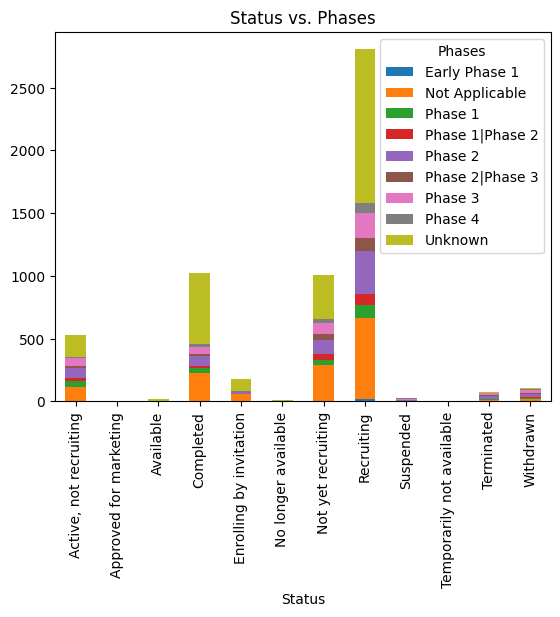

In [ ]:
status_phase.plot(kind='bar', stacked=True, title='Status vs. Phases')

**In Recruiting most of the phases has occured and Unknown is the most out of them**

In [ ]:
status_phase.stack()

Status                  Phases         
Active, not recruiting  Early Phase 1        7
                        Not Applicable     111
                        Phase 1             44
                        Phase 1|Phase 2     26
                        Phase 2             81
                                          ... 
Withdrawn               Phase 2             30
                        Phase 2|Phase 3      6
                        Phase 3             20
                        Phase 4              7
                        Unknown             11
Length: 108, dtype: int64

In [ ]:
from tempfile import template
import plotly.graph_objects as go

# Assuming `status_phase` is a DataFrame
# Convert the DataFrame to a format suitable for Plotly
status_phase_data = status_phase.reset_index()  # Reset index to include 'Status' as a column

# Initialize a figure
fig = go.Figure()

# Iterate through each phase (column) in the DataFrame (excluding 'Status')
for phase in status_phase.columns:
    fig.add_trace(go.Bar(
        name=phase,
        x=status_phase_data['Status'],  # X-axis as Status
        y=status_phase_data[phase],  # Y-axis as the count of the phase

    ))

# Update layout for a stacked bar chart
fig.update_layout(
    barmode='stack',  # Stacking mode
    title='Stacked Bar Chart of Status by Phases',
    xaxis=dict(title='Status'),
    yaxis=dict(title='Count'),
    legend=dict(title='Phases'),
    template='plotly_dark',
)

# Show the figure
fig.show()


In [ ]:
status_phase_data

Phases,Status,Early Phase 1,Not Applicable,Phase 1,Phase 1|Phase 2,Phase 2,Phase 2|Phase 3,Phase 3,Phase 4,Unknown
0,"Active, not recruiting",7,111,44,26,81,15,59,8,175
1,Approved for marketing,0,0,0,0,0,0,0,0,2
2,Available,0,0,0,0,0,0,0,0,19
3,Completed,3,226,38,17,78,20,56,22,565
4,Enrolling by invitation,4,54,1,3,10,1,6,6,96
5,No longer available,0,0,0,0,0,0,0,0,12
6,Not yet recruiting,5,282,42,46,114,46,89,30,350
7,Recruiting,22,647,98,92,343,102,196,81,1224
8,Suspended,2,2,0,2,4,4,9,2,2
9,Temporarily not available,0,0,0,0,0,0,0,0,1


In [ ]:
df[['Conditions', 'Outcome Measures']]

,Conditions,Outcome Measures
0,Covid19,Evaluate the diagnostic performance of the ID ...
1,SARS-CoV-2 Infection,Change on viral load results from baseline aft...
2,covid19,A qualitative analysis of parenchymal lung dam...
3,COVID,Proportion of asymptomatic subjects|Proportion...
4,Maternal Fetal Infection Transmission|COVID-19...,COVID-19 by positive PCR in cord blood and / o...
...,...,...
5778,Alcohol Drinking|Telemedicine,Number of risky drinking days|Number of patien...
5779,Community Acquired Pneumonia in Children|Antib...,Antibiotic treatment rates in hospitalized chi...
5780,Stress|Psychological,Perceived Stress|Task switching paradigm|Digit...
5781,Emotional Problem|Anxiety Disorder of Childhoo...,The child's impact of mental health problems r...


In [ ]:
df.loc[142,'Outcome Measures']

'COVID-19 Prevalence Rate / Expected Values counts|COVID-19 Prevalence Rate / Expected Values percentages|Collection Performance/ Incidence Rate counts|Collection Performance/ Incidence Rate percentages|Sensitivity and specificity'

In [ ]:
# Conditions vs. Outcome Measures: Understand the common outcome measures for different conditions.

conditions_outcomes = df.groupby('Conditions')['Outcome Measures'].apply(lambda x: ', '.join(x.dropna().astype(str))).reset_index()
conditions_outcomes

,Conditions,Outcome Measures
0,2019 Novel Coronavirus,Proportion of participants who improve by at l...
1,2019 Novel Coronavirus Infection,new-onset COVID-19|Number of Participants with...
2,2019 Novel Coronavirus Infection|COVID-19 Viru...,Number of participants with treatment emergent...
3,2019 Novel Coronavirus Pneumonia,Clinical recovery time|Complete fever time|Cou...
4,2019 Novel Coronavirus Pneumonia|COVID-19,Pneumonia severity index|Oxygenation index (Pa...
...,...,...
3062,the Lung Complication of COVID-19,lung injury score|Angiotensin 1-7 (Ang 1-7) ch...
3063,the Prognostic Value of Ferritin|Glycosylated ...,assessment of the prognostic value of ferritin...
3064,the Study Focus on the Uses of Telephone and O...,- To provide an overview about the pros and co...
3065,the Use of Modern Technology Applications in H...,rate of reassurance delivered from doctors to ...


# Time Series Analysis

In [ ]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [ ]:
df[['Start Date', 'Primary Completion Date']]

,Start Date,Primary Completion Date
0,"November 9, 2020","December 22, 2020"
1,"November 2, 2020","December 15, 2020"
2,"May 7, 2020","June 15, 2021"
3,"May 25, 2020","July 31, 2020"
4,"May 5, 2020",May 2021
...,...,...
5778,"March 23, 2020",August 2022
5779,April 2021,November 2024
5780,"February 10, 2021",July 2021
5781,"March 22, 2021","May 31, 2022"


In [ ]:
# Convert date columns to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')


<Axes: title={'center': 'Trials Started Over Time'}, xlabel='Start Date'>

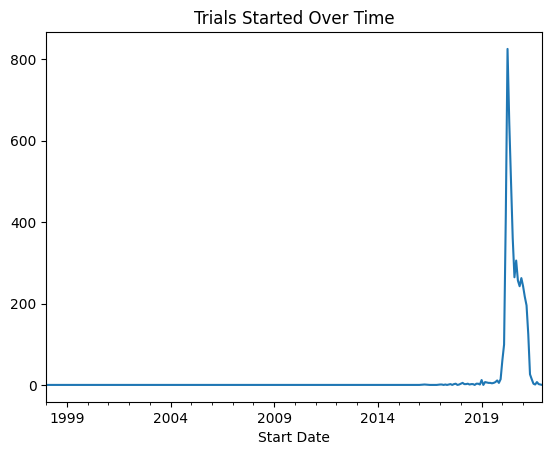

In [ ]:
# Plot the number of trials started over time
df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind= 'line', title='Trials Started Over Time')

**Trials Started After the pandemic of COVID-19 in 2019 after most of the trails occured**

In [ ]:
df['Start Date'].dt.to_period('M').value_counts().sort_index().index.to_timestamp()

DatetimeIndex(['1998-01-01', '2010-03-01', '2011-02-01', '2011-03-01',
               '2012-01-01', '2012-02-01', '2012-05-01', '2013-01-01',
               '2013-04-01', '2013-10-01', '2014-01-01', '2015-01-01',
               '2015-10-01', '2016-01-01', '2016-04-01', '2016-07-01',
               '2016-10-01', '2016-11-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
      

In [ ]:
# Ensure 'Start Date' is a datetime object
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Group data by month and count the number of trials
trials_over_time = df['Start Date'].dt.to_period('M').value_counts().sort_index()

# Convert PeriodIndex to a datetime format suitable for Plotly
trials_over_time.index = trials_over_time.index.to_timestamp()

# Create a Plotly line chart
fig = px.line(
    x=trials_over_time.index,
    y=trials_over_time.values,
    labels={'x': 'Month', 'y': 'Number of Trials'},
    title='Trials Started Over Time'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Time (Monthly)',
    yaxis_title='Number of Trials',
    title_x=0.5,  # Center the title
    template='plotly_white'  # Clean theme
)

# Show the plot
fig.show()


**Summarize the findings from your EDA. For example:**<br>
● The majority of trials are in the "Completed" phase.<br>
● Most trials target adult populations.<br>
● There's a steady increase in the number of trials over time.<br>

In [ ]:
from datetime import date

cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='int64').columns
date_cols = df.select_dtypes(include='datetime64').columns

In [ ]:
df[num_cols].dtypes

,0
Rank,int64


In [ ]:
df[cat_cols].dtypes

,0
NCT Number,object
Title,object
Acronym,object
Status,object
Study Results,object
Conditions,object
Interventions,object
Outcome Measures,object
Sponsor/Collaborators,object
Gender,object


In [ ]:
df[date_cols].dtypes

,0
Start Date,datetime64[ns]
Primary Completion Date,datetime64[ns]


In [ ]:
# Visualize data without calculating
def visualize_data(data, caption='', ylabel='Percentage of Missing Data'):
    # Set figure size
    sns.set(rc={'figure.figsize': (15, 8.27)})

    # Make ticks vertical
    plt.xticks(rotation=90)

    # Set title and plot the bar chart for the highest 40 values or the available data
    sns.barplot(
        x=data.keys()[:min(40, len(data))].tolist(),
        y=data.values[:min(40, len(data))].tolist()
    ).set_title(caption)

    # Set the Y-axis label
    plt.ylabel(ylabel)

    # Display the plot
    plt.show()


In [ ]:
# Detecting (Percentage) Missing Data
missing_data = df.isnull().mean() * 100
missing_data

,0
Rank,0.000000
NCT Number,0.000000
Title,0.000000
Acronym,57.115684
Status,0.000000
Study Results,0.000000
Conditions,0.000000
Interventions,15.320768
Outcome Measures,0.605222
Sponsor/Collaborators,0.000000


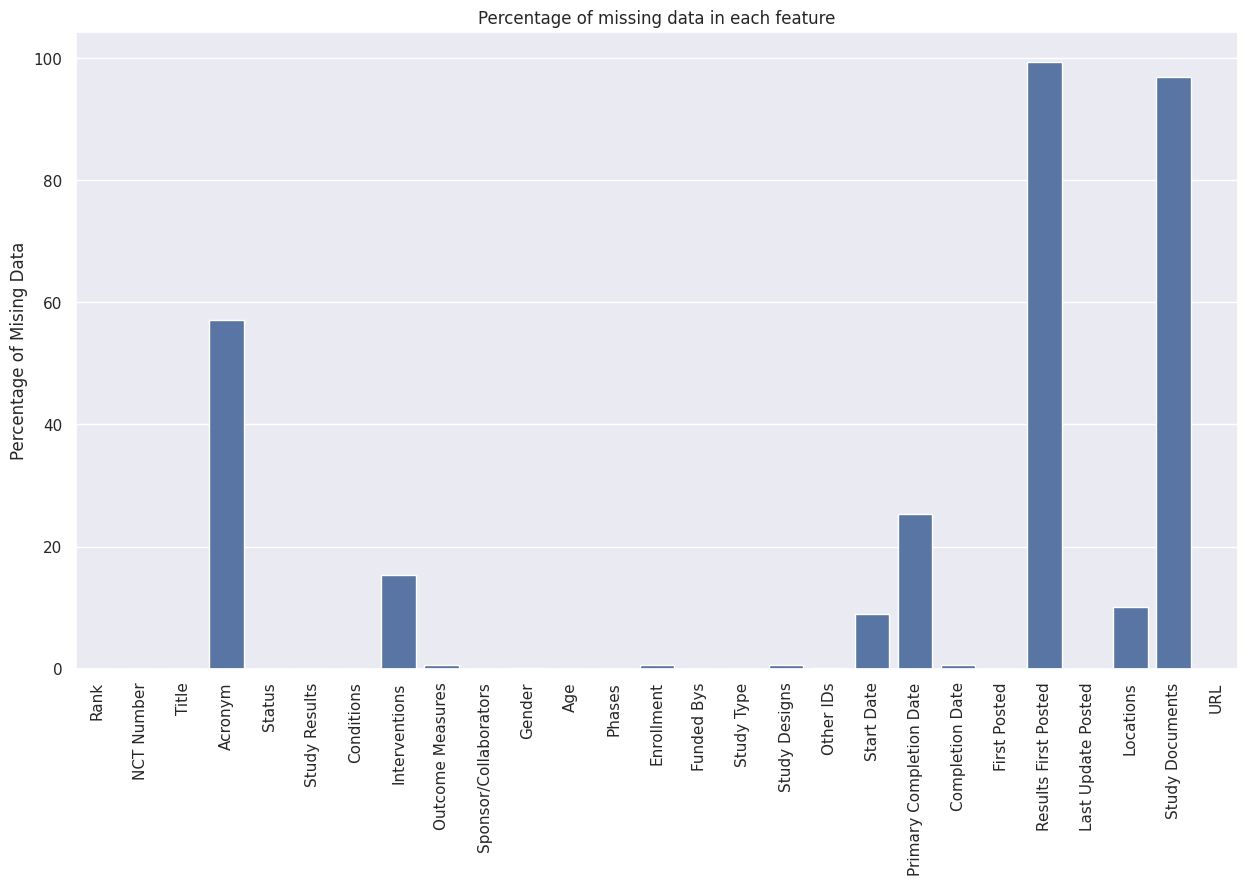

In [ ]:
visualize_data(missing_data , 'Percentage of missing data in each feature')

**Acronym, Results First Posted and Study Documents features have most missing values**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Locations']


,Locations
0,"Groupe Hospitalier Paris Saint-Joseph, Paris, ..."
1,"Cimedical, Barranquilla, Atlantico, Colombia"
2,"Ospedale Papa Giovanni XXIII, Bergamo, Italy|P..."
3,"Hong Kong Sanatorium & Hospital, Hong Kong, Ho..."
4,"CHR Orléans, Orléans, France"
...,...
5778,"UW Health at the American Center, Madison, Wis..."
5779,"Die Filderklinik, Filderstadt, Baden-Württembe..."
5780,"University of Illinois at Urbana-Champaign, Ur..."
5781,"Mental Health Services in the Capital Region, ..."


In [ ]:
# We can extract a new feature form The Location which is the country where the study hold
countries = [ str(df.Locations.iloc[i]).split(',')[-1] for i in range(df.shape[0])]
df['Country'] = countries

In [ ]:
df['Country'].value_counts()

,count
Country,
United States,1267
France,647
nan,585
United Kingdom,306
Italy,235
...,...
Oman,1
Kyrgyzstan,1
Mali,1


In [ ]:
des

,Null Values,Null %,Data Type,Unique Values
Rank,0,0.0,int64,5783
NCT Number,0,0.0,object,5783
Title,0,0.0,object,5775
Acronym,3303,57.0,object,2338
Status,0,0.0,object,12
Study Results,0,0.0,object,2
Conditions,0,0.0,object,3067
Interventions,886,15.0,object,4337
Outcome Measures,35,1.0,object,5687
Sponsor/Collaborators,0,0.0,object,3631


In [ ]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL', 'Country'],
      dtype='object')

In [ ]:
# Deal with Missing Values

Now We need to clasify the missing data to one of these categories <br>
1) Missing Completely At Random (MCAR)<br>

2) Missing At Random (MAR)<br>

3) Not Missing At Random (NMAR)<br>

In [ ]:
print(f"Number of unique values is {df.Acronym.nunique()} \n")
df.Acronym.value_counts()

Number of unique values is 2338 



,count
Acronym,
COVID-19,47
PROTECT,7
CORONA,6
RECOVER,5
SCOPE,5
...,...
ASD,1
VICO,1
LICORNE,1


In [ ]:
# Find the realtion between null values in Acronym and Countries

(df.Acronym.isnull().groupby(df.Country).mean().sort_values(ascending = False) * 100)[:60]

,Acronym
Country,
Iraq,100.000000
Belarus,100.000000
Rwanda,100.000000
South Sudan,100.000000
Cambodia,100.000000
Bulgaria,100.000000
Cyprus,100.000000
Bosnia and Herzegovina,100.000000
Guinea-Bissau,100.000000


    ● After inspecting the relation between the missing values in Acronym and Country we can conclude that
    there is a sort of relation between these two features, so we can say that Data is Missing At Random
    (MAR).
    ● So we can Impute by Missing Category.

In [ ]:
# impute by a missing Indicator
df.Acronym = df.Acronym.fillna("Missing Acronym")

In [ ]:
# Impute Interventions , Phases , Locations by Missing Category



In [ ]:
cat_cols

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys',
       'Study Type', 'Study Designs', 'Other IDs', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Documents', 'URL'],
      dtype='object')

In [ ]:
df.shape

(5783, 28)

In [ ]:
df[cat_cols].isnull().mean() * 100

,0
NCT Number,0.000000
Title,0.000000
Acronym,0.000000
Status,0.000000
Study Results,0.000000
Conditions,0.000000
Interventions,15.320768
Outcome Measures,0.605222
Sponsor/Collaborators,0.000000
Gender,0.172921


In [ ]:
# features = categorical_features[df[categorical_features].isnull().mean() > 0]

c_nan = df[cat_cols].isnull().mean() * 100 > 0
features = c_nan[c_nan].index.to_list()

In [ ]:
features

['Interventions',
 'Outcome Measures',
 'Gender',
 'Study Designs',
 'Other IDs',
 'Completion Date',
 'Results First Posted',
 'Locations',
 'Study Documents']

In [ ]:
for feature in features:
  df[feature] = df[feature].fillna(f"Missing {feature}")

In [ ]:
# Check the skewness
df.Enrollment.skew()

34.06593382031148

In [ ]:
df.Enrollment.isnull().sum()

34

<Axes: ylabel='Density'>

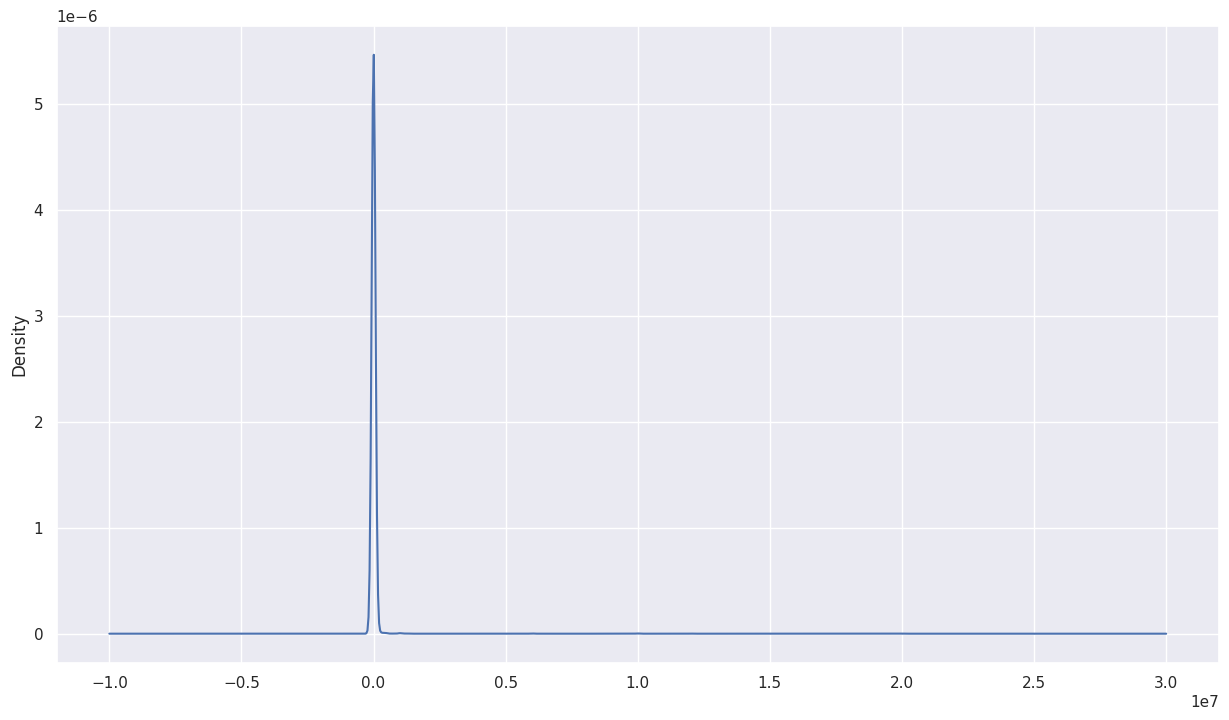

In [ ]:
# Plotting the distribution of the enrollment
df.Enrollment.plot(kind = 'kde')

In [ ]:
# we will Impute it by Median

# Some Statstical Valuse for the Enrollment Column
min_Value = df.Enrollment.min()
max_Value = df.Enrollment.max()
mean_Value = df.Enrollment.mean()
median_Value = df.Enrollment.median()
std_Value = df.Enrollment.std()
print(f"the min value is {min_Value} \n \
The max value is {max_Value} \n \
The mean is {mean_Value} \n \
The Median is {median_Value} \n \
Standard Devation is {std_Value}")

the min value is 0.0 
 The max value is 20000000.0 
 The mean is 18319.48860671421 
 The Median is 170.0 
 Standard Devation is 404543.7287841073


In [ ]:
# Using Median to impute Missing Values
df.Enrollment = df.Enrollment.fillna(median_Value)

## Data Visualizations

In [ ]:
# Visualize data without calculating
def visualize_data(data, caption='', ylabel='Percentage of Missing Data'):
    # Set figure size
    sns.set(rc={'figure.figsize': (15, 8.27)})

    # Make ticks vertical
    plt.xticks(rotation=90)

    # Set title and plot the bar chart for the highest 40 values or the available data
    sns.barplot(
        x=data.keys()[:min(40, len(data))].tolist(),
        y=data.values[:min(40, len(data))].tolist()
    ).set_title(caption)

    # Set the Y-axis label
    plt.ylabel(ylabel)

    # Display the plot
    plt.show()

In [ ]:
import plotly.express as px

def viz_data(data, caption='', ylabel='Percentage of Missing Data'):
    # Ensure data is a Pandas Series for `.index` and `.values`
    if not hasattr(data, 'index') or not hasattr(data, 'values'):
        raise ValueError("The 'data' parameter must be a Pandas Series.")

    # Create the bar chart
    fig = px.bar(
        data,
        x=data.index,
        y=data.values,
        labels={'x': 'Feature', 'y': ylabel},
        title=caption,
        color=data.values,
        color_continuous_scale=px.colors.sequential.RdBu,
    )

    # Add text annotations for the bar values
    fig.update_traces(
        text=data.values,
        textposition='outside',
        textfont=dict(size=12)
    )

    # Show the plot
    fig.show()


In [ ]:
# Get Countires with highest Contributiuons
top_10_Countires = df.Country.value_counts()[:10]

viz_data(top_10_Countires , caption = 'Top 10 Countries' , ylabel = 'Contributions')

**United States has contributed the most**

In [ ]:
# Status of the Application
status = df.Status.value_counts()
# visualize_data(status , caption = 'Status of The Application' , ylabel = 'Denisty')
viz_data(status , caption = 'Status of The Application' , ylabel = 'Denisty')

In [ ]:
# Gender Visualiztions
gender = df.Gender.value_counts()

viz_data(gender , caption = 'Gender' , ylabel = 'Denisty')

In [ ]:
df['Start Date'].dt.month_name()

,Start Date
0,November
1,November
2,May
3,May
4,May
...,...
5778,March
5779,NaN
5780,February
5781,March


In [ ]:
# Which month has the highest start
start_month = pd.Series([ str(df['Start Date'].dt.month_name().iloc[i]).split(' ')[0] for i in range(df.shape[0])])
start_month_Distribution = start_month.value_counts()
start_month_Distribution

,count
April,965
May,684
March,627
June,527
nan,520
July,377
January,329
February,328
September,326
December,283


In [ ]:
viz_data(start_month_Distribution , caption = 'Start Month' , ylabel = 'Denisty')

**On the month of April Most Trails has occured**